## Lectura del archivo csv con pandas

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
df = pd.read_csv("Measurement_summary.csv")
df

,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,Station Code
0,37.572016,127.005008,0.004,0.059,0.002,1.2,73,57,101
1,37.572016,127.005008,0.004,0.058,0.002,1.2,71,59,101
2,37.572016,127.005008,0.004,0.056,0.002,1.2,70,59,101
3,37.572016,127.005008,0.004,0.056,0.002,1.2,70,58,101
4,37.572016,127.005008,0.003,0.051,0.002,1.2,69,61,101
...,...,...,...,...,...,...,...,...,...
647506,37.544962,127.136792,0.003,0.028,0.013,0.5,23,17,125
647507,37.544962,127.136792,0.003,0.025,0.015,0.4,25,19,125
647508,37.544962,127.136792,0.003,0.023,0.015,0.4,24,17,125
647509,37.544962,127.136792,0.003,0.040,0.004,0.5,25,18,125


In [3]:
import numpy as np
mat = df.to_numpy()

In [4]:
X1 = np.delete(mat, 8, 1)
y1 = mat[:,8]

## Dividimos los datos, el 70% sera para entrenar el modelo mientras que el restante 30% sera para testear en modelo

In [5]:
from sklearn.model_selection import train_test_split 
x_entrenar, x_test, y_entrenar, y_test = train_test_split(X1, y1, test_size=0.3, random_state=3)

# Se define el algoritmo a utilizar
# Arboles de decisión - Entropy 

In [6]:
from sklearn import tree
clasificador = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 5)
clasificacion = clasificador.fit(x_entrenar, y_entrenar)
print(clasificacion)

DecisionTreeClassifier(criterion='entropy', max_depth=5)


### Mostramos el array, de datos prediccion y comparamos con los valores reales

In [7]:
prediccion = clasificacion.predict(x_test)
print(prediccion)

[117. 104. 116. ... 115. 104. 111.]


In [8]:
print('Prediccion del modelo\n', prediccion[4:10])
print('Valores realez\n', y_test[4:10])

Prediccion del modelo
 [111. 125. 103. 112. 104. 109.]
Valores realez
 [111. 125. 103. 112. 104. 109.]


## Calculo de precicion del modelo

In [9]:
from sklearn import metrics
print('Precision del Arbol: ', metrics.accuracy_score(y_test,prediccion ))

Precision del Arbol:  1.0


## Mostramos la matriz de confusion

In [10]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, prediccion)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[7884    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [   0 7749    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 7765    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 7782    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0 7599    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 7901    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 7742    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 7757    0    0    0    0    0   

[Text(178.6280487804878, 199.32, 'X[0] <= 37.546\nentropy = 4.644\nsamples = 453257\nvalue = [18021, 18156, 18139, 18114, 18291, 18004, 18149, 18137\n18155, 18088, 18141, 18232, 18224, 18171, 18161, 18142\n18277, 18058, 17999, 18101, 17970, 18146, 18072, 18178\n18131]'),
 Text(95.94878048780488, 163.07999999999998, 'X[1] <= 126.983\nentropy = 3.7\nsamples = 235523\nvalue = [0, 0, 18139, 0, 0, 0, 18149, 0, 0, 0, 0, 0, 0\n0, 18161, 18142, 18277, 18058, 17999, 18101, 17970\n18146, 18072, 18178, 18131]'),
 Text(44.91219512195122, 126.83999999999999, 'X[1] <= 126.894\nentropy = 2.807\nsamples = 126708\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n18161, 18142, 18277, 18058, 17999, 18101, 17970, 0, 0\n0, 0]'),
 Text(16.33170731707317, 90.6, 'X[0] <= 37.512\nentropy = 1.585\nsamples = 54580\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n18161, 18142, 18277, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(8.165853658536586, 54.359999999999985, 'entropy = 0.0\nsamples = 18277\nvalue = [0, 0, 0, 0, 

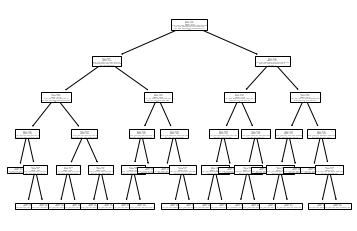

In [11]:
tree.plot_tree(clasificacion)

### Guardamos y mostramos el grafico del arbol

In [15]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import tree
dot_data = StringIO()
filename = "arbol_python.png"

featureNames = df.columns[0:8]
targetNames = df["Station Code"].unique().tolist()
y_test_str = [str(i) for i in y_test]
out=tree.export_graphviz(clasificador, feature_names=featureNames, out_file=dot_data, class_names=np.unique(y_test_str), filled=True)

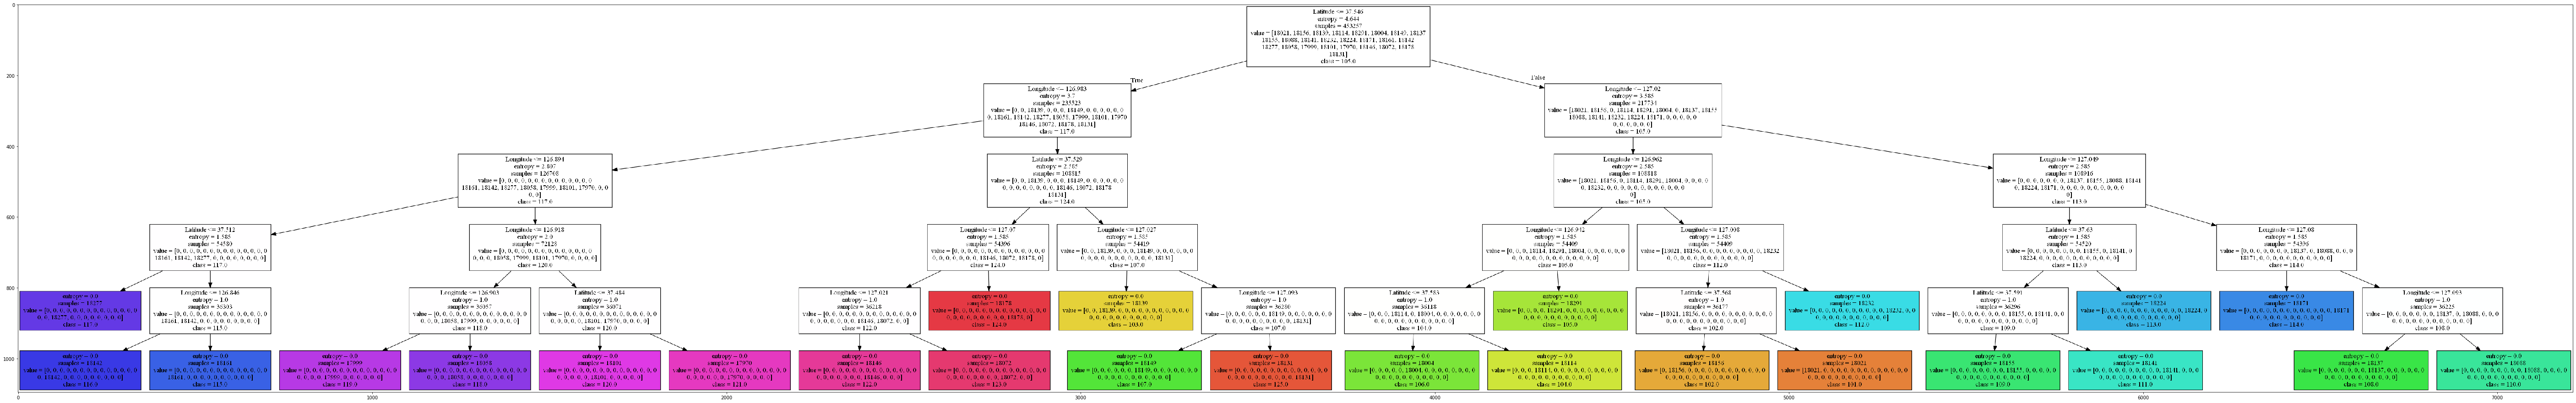

In [16]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100,200))
plt.imshow(img, interpolation='nearest')